<a href="https://colab.research.google.com/github/iam-fern/real_data/blob/main/China_Health_and_Nutrition_Survey_(CHNS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import random
import statsmodels.api as sm
%matplotlib inline
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# where your file is located
FILE_LOCATION = '/content/drive/My Drive/pattern_realdata/pexam_pub_12.sas7bdat'

In [4]:
df = pd.read_sas(FILE_LOCATION)
df
#df.head()

/usr/local/lib/python3.7/dist-packages/pandas/io/sas/sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")


,IDind,U25,U26,U27,U28,U29,U34,U35,U36,U424,...,U16,U17,U18,U19,U1D,CM1,U7_91,U8_91,U9_91,temp
0,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.111010e+11,1.0,28.0,0.0,NaN,360.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
2,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.111010e+11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
4,1.111010e+11,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126403,5.523040e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36.7
126404,5.523042e+11,1.0,18.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0
126405,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.1
126406,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0


###### **U21:** AGE (YEARS) AT 1ST MENSTRUATION  อายุ (ปี) เมื่อมีประจำเดือนครั้งแรก
###### **U22:** DIAGNOSED WITH HIGH BLOOD PRESSURE? ตรวจพบความดันโลหิตสูงหรือไม่?
###### **U23:** OF YEARS HAD HIGH BLOOD PRESSURE ปีมีความดันโลหิตสูง
###### **U24:** TAKING ANTI-HYPERTENSION DRUGS? ทานยาป้องกันความดันโลหิตสูงหรือไม่?
###### **U24A:** DIAGNOSED WITH DIABETES? วินิจฉัยว่าเป็นเบาหวานหรือไม่?
###### **U24B:** AGE (YEARS) AT DIABETES DIAGNOSIS อายุ (ปี) ที่การวินิจฉัยโรคเบาหวาน
###### **U24C:** DIABETES TREATMENT: SPECIAL DIET การรักษาโรคเบาหวาน: อาหารพิเศษ

In [5]:
table = df[['IDind', 'U24W2', 'U26']]
table

,IDind,U24W2,U26
0,1.111010e+11,NaN,NaN
1,1.111010e+11,NaN,28.0
2,1.111010e+11,64.0,NaN
3,1.111010e+11,65.0,NaN
4,1.111010e+11,NaN,NaN
...,...,...,...
126403,5.523040e+11,NaN,NaN
126404,5.523042e+11,NaN,18.0
126405,5.523042e+11,NaN,NaN
126406,5.523042e+11,NaN,NaN


In [6]:
# Define in which columns to look for missing values.
table1 = table.dropna(subset=['U24W2', 'U26'])
table1

,IDind,U24W2,U26
303,1.111040e+11,89.0,30.0
977,1.113030e+11,55.0,22.0
1052,1.113030e+11,52.0,30.0
5432,2.112031e+11,82.0,-99.0
11515,2.123050e+11,68.0,20.0
16825,2.321010e+11,50.0,20.0
20821,2.323041e+11,52.0,23.0
21631,2.324030e+11,48.0,16.0
22372,3.111010e+11,64.0,25.0
22578,3.111030e+11,60.0,18.0


In [7]:
x = table1[["U26"]]
y = table1["U24W2"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

df = pd.DataFrame({"Actual": y, "Predicted": y_pred})

table_data_new = pd.DataFrame({ "x1"    : table1["U26"],
                                "y"     : df["Actual"],
                                "y_hat" : df["Predicted"]})
table_data_new["e"] = table_data_new["y"] - table_data_new["y_hat"]
table_data_new

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,x1,y,y_hat,e
303,30.0,89.0,56.508794,32.491206
977,22.0,55.0,56.664724,-1.664724
1052,30.0,52.0,56.508794,-4.508794
5432,-99.0,82.0,59.023161,22.976839
11515,20.0,68.0,56.703706,11.296294
16825,20.0,50.0,56.703706,-6.703706
20821,23.0,52.0,56.645233,-4.645233
21631,16.0,48.0,56.781671,-8.781671
22372,25.0,64.0,56.606250,7.393750
22578,18.0,60.0,56.742689,3.257311


In [30]:
table_data_new.to_csv('CHNS_U24W2_U26.csv')
files.download('CHNS_U24W2_U26.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

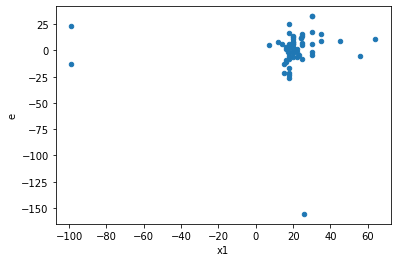

In [8]:
table_data_new.plot(x ='x1', y='e', kind = 'scatter')

In [9]:
# เรียง data จากน้อยไปมากตาม x1
new_table_sort = table_data_new.sort_values('x1')
new_table_sort.reset_index(inplace=True)
new_table_sort.drop(['index'], axis=1, inplace=True)
new_table_sort

,x1,y,y_hat,e
0,-99.0,82.0,59.023161,22.976839
1,-99.0,46.0,59.023161,-13.023161
2,7.0,62.0,56.957092,5.042908
3,12.0,65.0,56.859636,8.140364
4,14.0,63.0,56.820654,6.179346
5,15.0,35.0,56.801162,-21.801162
6,15.0,44.0,56.801162,-12.801162
7,16.0,58.0,56.781671,1.218329
8,16.0,46.0,56.781671,-10.781671
9,16.0,60.0,56.781671,3.218329


In [10]:
# กำหนด % การแบ่งข้อมูล
percent_data = 0.4

In [11]:
# แบ่งข้อมูลกลุ่มที่ 1
table_new1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
table_new1

,x1,y,y_hat,e
0,-99.0,82.0,59.023161,22.976839
1,-99.0,46.0,59.023161,-13.023161
2,7.0,62.0,56.957092,5.042908
3,12.0,65.0,56.859636,8.140364
4,14.0,63.0,56.820654,6.179346
5,15.0,35.0,56.801162,-21.801162
6,15.0,44.0,56.801162,-12.801162
7,16.0,58.0,56.781671,1.218329
8,16.0,46.0,56.781671,-10.781671
9,16.0,60.0,56.781671,3.218329


In [12]:
# แบ่งข้อมูลกลุ่มที่ 1
table_new1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
y = table_new1['y']
x = table_new1[['x1']]
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()

# หาค่า df กลุ่ม 1
DF1 = model1.df_resid + 1
SSE1 = model1.ssr
MSE1 = SSE1/DF1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
DF1

22.0

In [14]:
SSE1

4384.624090115139

In [15]:
# แบ่งข้อมูลกลุ่มที่ 2
table_new2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]
table_new2

,x1,y,y_hat,e
35,20.0,69.0,56.703706,12.296294
36,22.0,55.0,56.664724,-1.664724
37,22.0,50.0,56.664724,-6.664724
38,22.0,58.0,56.664724,1.335276
39,23.0,52.0,56.645233,-4.645233
40,24.0,68.0,56.625741,11.374259
41,24.0,68.0,56.625741,11.374259
42,25.0,64.0,56.606250,7.393750
43,25.0,62.0,56.606250,5.393750
44,25.0,72.0,56.606250,15.393750


In [16]:
# แบ่งข้อมูลกลุ่มที่ 2
table_new2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]
y = table_new1['y']
x = table_new1[['x1']]

# add constant to predictor variable
x = sm.add_constant(x)
# fit linear regression model
model2 = sm.OLS(y, x).fit()

# หาค่า df กลุ่ม 2
DF2 = model2.df_resid + 1
SSE2 = model2.ssr
MSE2 = SSE2/DF2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
DF2

22.0

In [18]:
SSE2

4384.624090115139

In [19]:
# ค่าสถิติทดสอบ
GQ_test = (SSE2/DF2) / (SSE1/DF1)
GQ_test

1.0

In [20]:
# คำนวณค่า p-value
# pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, DF2, DF1)))
p_greater = ss.f.cdf(GQ_test, DF2, DF1)
p_less = 1.0-ss.f.cdf(GQ_test, DF2, DF1)

In [21]:
two_tailed

1.0

In [22]:
p_greater

0.5

In [23]:
p_less

0.5

In [24]:
Significance = 0.05
if two_tailed < Significance:
  print('Reject005=0 : Heteroscedasticity')
else:
  print('Reject005=1 : Homoscedasticity')

Reject005=1 : Homoscedasticity
